1. Display Top 5 Rows of The Dataset
2. Check the Last 3 Rows of The Dataset
3. Find Shape of Our Dataset (Number of Rows & Number of Columns)
4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Get Overall Statistics About The Dataframe
6. Data Filtering
7.Check Null Values In The Dataset
8. Drop the Column
9. Handle Missing Values
10. Categorical Data Encoding

In [5]:
import pandas as pd

import numpy as np


import seaborn as sns

import matplotlib.pyplot as plt


data = pd.read_csv("/content/train.csv")

# 1 to 3

data.head(5)

data.tail(3)

data.shape

(891, 12)

In [6]:
# 4 to 5

data.info()

data.describe()

sum(data['Survived'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


342

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


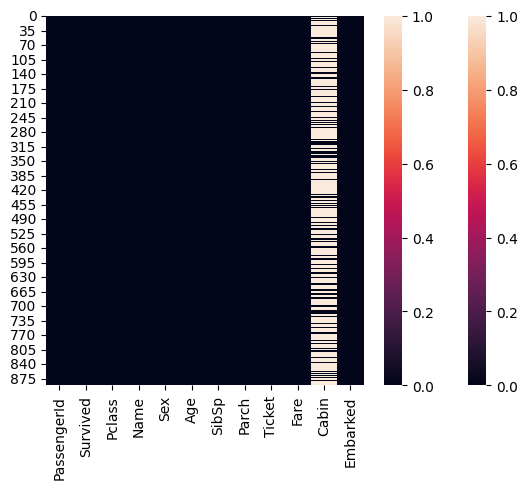

In [7]:
# 6 to 10

data.isnull().any()




# data = data.drop('Cabin',axis=1)






data['Embarked'] = data['Embarked'].fillna('S')

sns.heatmap(data.isna())


data['Age'] = data['Age'].fillna(data['Age'].mean())


sns.heatmap(data.isna())

data.isna().any()

data

In [8]:
data['Gender'] = np.where(1,data['Sex']== 'male',0)

data['Embarked'].unique()

pd.get_dummies(data,columns=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,0,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,1,True,False,False


#QUESTIONS


11. What is Univariate Analysis?
How Many People Survived And How Many Died?
How Many Passengers Were In First Class, Second Class, and Third Class?
Number of Male And Female Passengers
12. Bivariate Analysis
How Has Better Chance of Survival Male or Female?
Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)?
13. Feature Engineering



<Axes: xlabel='Survived', ylabel='Age'>

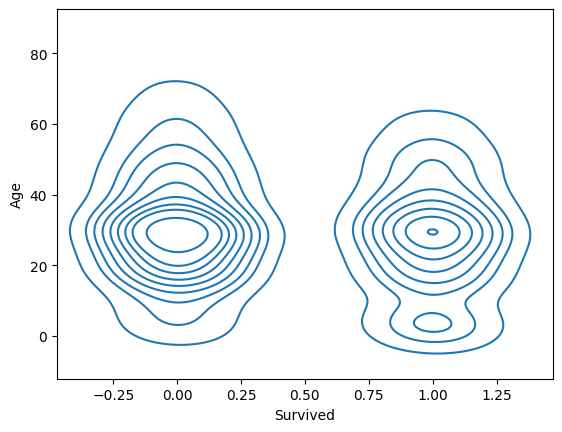

In [28]:
# 11

data['Survived'].value_counts()

sns.countplot(data=data,x='Survived')


data['Pclass'].value_counts()

sns.countplot(data = data, x ='Pclass')

data['Gender'].value_counts()

sns.countplot(data=data,x='Gender')


sns.kdeplot(data = data,x='Survived',y='Age')

The males survival percentage is 35.24130190796858 and the female survival percentage is 64.75869809203144


<Axes: xlabel='Gender', ylabel='Survived'>

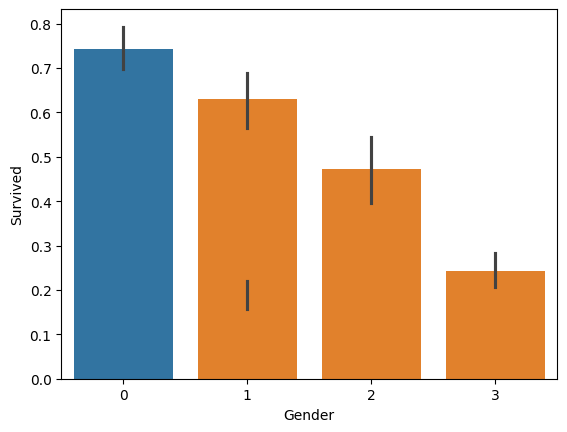

In [10]:
# 12

total = data['Survived'].count()
df_1 = data.groupby('Gender').agg({'Survived':pd.Series.count})


male_survive_perc = int(df_1['Survived'][0])/int(total) * 100
female_survive_perc = int(df_1['Survived'][1])/int(total) * 100

print(f"The males survival percentage is {male_survive_perc} and the female survival percentage is {female_survive_perc}")




sns.barplot(x=data['Gender'],y=data['Survived'])

sns.barplot(x=data['Pclass'],y=data['Survived'])

In [11]:
data['Older_than_30'] = np.where(1, data['Age'] > 30  , 0)

data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Older_than_30
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0


# 2 Predicting using Models

## Splitting data into training and testing

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

data_1 = data.values

data

X = data[['Pclass','Gender']]

Y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

## 1 . SVM

In [61]:
from sklearn.svm import SVC

model_1 = SVC()

model_1.fit(X_train,y_train)

prediction_1 = model_1.predict(X_test)

print(f"The accuracy score of svm is {round(accuracy_score(y_test,prediction_1) * 100,2)} %")





The accuracy score of svm is 79.33 %


# 2 Logastic Regression


In [62]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()

model_2.fit(X_train,y_train)

prediction_2 = model_2.predict(X_test)

print(f"The accuracy score of Logastic regression is {round(accuracy_score(y_test,prediction_2) * 100,2)} %")


The accuracy score of Logastic regression is 81.01 %


# 3 Decision Tree Classification

In [67]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier()


model_3.fit(X_train,y_train)

prediction_3 = model_3.predict(X_test)

print(f"The accuracy score of Decsion tree classification is {round(accuracy_score(y_test,prediction_3) * 100,2)} %")


The accuracy score of Decsion tree classification is 79.33 %


# KNN Classification

In [75]:
from sklearn.neighbors import KNeighborsClassifier

model_4 = KNeighborsClassifier(n_neighbors=2)

model_4.fit(X_train,y_train)

prediction_4 = model_4.predict(X_test)

print(f"The accuracy score of KNN classification is {round(accuracy_score(y_test,prediction_4) * 100,2)} %")


The accuracy score of KNN classification is 79.33 %


# Classification Reports

In [77]:
from sklearn.metrics import classification_report

print(f"The classification report for SVM is {classification_report(y_test,prediction_1)}")
print(f"The classification report for Logastic is {classification_report(y_test,prediction_2)}")
print(f"The classification report for Decision Tree is {classification_report(y_test,prediction_3)}")
print(f"The classification report for KNN is {classification_report(y_test,prediction_1)}")

The classification report for SVM is               precision    recall  f1-score   support

           0       0.75      0.99      0.85       110
           1       0.97      0.48      0.64        69

    accuracy                           0.79       179
   macro avg       0.86      0.73      0.75       179
weighted avg       0.84      0.79      0.77       179

The classification report for Logastic is               precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

The classification report for Decision Tree is               precision    recall  f1-score   support

           0       0.75      0.99      0.85       110
           1       0.97      0.48      0.64        69

    accuracy                           0.79       179
  

# Testing the models

In [86]:
test_df = pd.read_csv("/content/test.csv")
answers = pd.read_csv("/content/gender_submission.csv")

test_df['Gender'] = np.where(1,test_df['Sex'] == "male",0)



X_test = test_df[['Pclass','Gender']]
y_test = answers['Survived']

prediction_1 = model_1.predict(X_test)
prediction_2 = model_2.predict(X_test)
prediction_3 = model_3.predict(X_test)
prediction_4 = model_4.predict(X_test)


print(f"The accuracy score of SVM is {round(accuracy_score(y_test,prediction_4) * 100,1)} %")
print(f"The accuracy score of Logastic Regression is {round(accuracy_score(y_test,prediction_2) * 100,2)} %")
print(f"The accuracy score of Decision Tree classification is {round(accuracy_score(y_test,prediction_3) * 100,2)} %")
print(f"The accuracy score of KNN classification is {round(accuracy_score(y_test,prediction_4) * 100,2)} %")


The accuracy score of SVM is 82.8 %
The accuracy score of Logastic Regression is 100.0 %
The accuracy score of Decision Tree classification is 82.78 %
The accuracy score of KNN classification is 82.78 %


# Thus for this dataset logastic Regression performed the best